<a href="https://colab.research.google.com/github/Kevoen/Google_Colab_Rep/blob/master/yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.42 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (9524/9524), done.


In [2]:
!head ./darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [3]:
!sed -i "s/GPU=0/GPU=1/g" ./darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" ./darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" ./darknet/Makefile

In [4]:
!head ./darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [5]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [6]:
%cd darknet/

/content/darknet


In [7]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [8]:
#加载预训练的权重
#YOLOv3 在COCO数据集上已经训练的很好了，我们不需要花大力气去训练，加载预训练的权重能够帮助我们更快的训练模型。
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-13 07:37:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   136KB/s    in 21m 36s 

2020-07-13 07:58:40 (187 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [10]:
#下载完成，保存到Google Drive备份
!cp /content/darknet/yolov3.weights /content/drive/My\ Drive/Colab_Notebooks

In [11]:
# 显示
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# 上传文件
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# 下载文件 
def download(path):
  from google.colab import files
  files.download(path)

In [12]:
%ls

3rdparty/   CMakeLists.txt          image_yolov3.sh*        README.md
backup/     darknet*                include/                results/
build/      DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build.ps1*  darknet.py              LICENSE                 src/
build.sh*   darknet_video.py        Makefile                video_v2.sh*
cfg/        data/                   net_cam_v3.sh*          video_yolov3.sh*
cmake/      image_yolov2.sh*        obj/                    yolov3.weights


用下面的命令进行检测
```
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet 自带了一些示例图片

In [13]:
!./darknet detect ./cfg/yolov3.cfg ./yolov3.weights ./data/dog.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

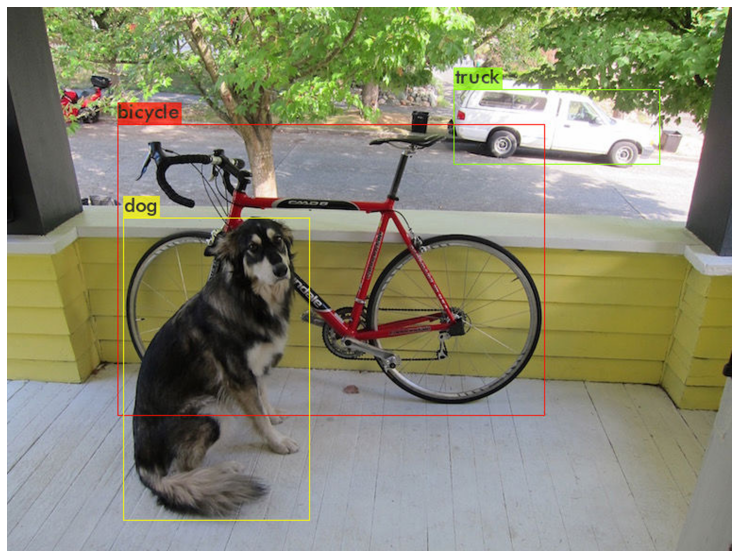

In [14]:
imShow('predictions.jpg')

In [ ]:
from PIL import Image
Image.open('./predictions.jpg')？

In [16]:
# 到这里抛出错误，阻断程序运行
assert False

AssertionError: ignored

In [18]:
%cd ..

/content


In [19]:
upload()

Saving 17-10-26-83-29.jpg to 17-10-26-83-29.jpg
saved file 17-10-26-83-29.jpg


/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

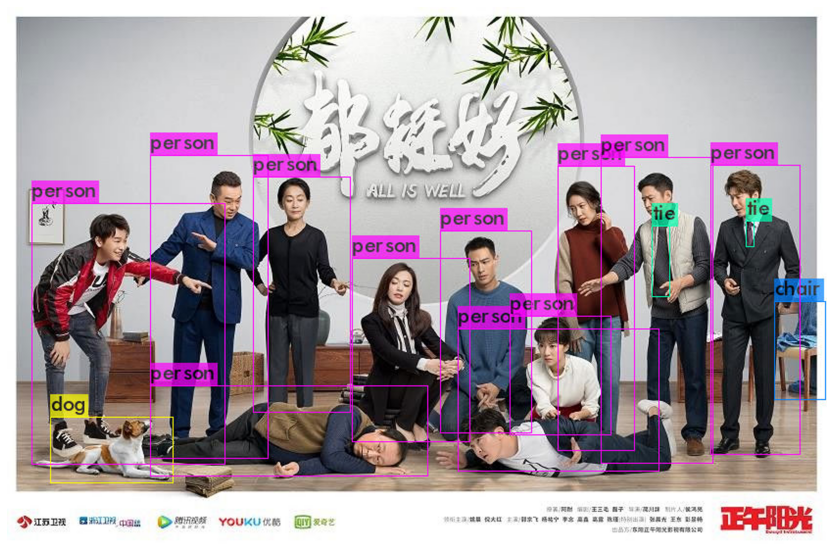

In [20]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../17-10-26-83-29.jpg
imShow('predictions.jpg')